### Carga de paquetes

In [43]:
#pip install pyheif
#pip install Pillow

import numpy as np


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf


import os
import glob
#from PIL import Image
import cv2

#import pyheif

import matplotlib.pyplot as plt


Seteamos los directorios done se encuentran las fotos recortadas: ORganizadas en una carpeta por persona.

In [ ]:
#root_path = "C:/MaestriaDocs/DMA - Proyecto/caras_grupo4/"
root_path = "../"
#directorio_origen = root_path + "Nuestras_Caras"
#destino = root_path + "Caras_cortadas"
dir_caras_cortadas = root_path + "Caras_aumentadas"

## Preparamos la matriz inicial

Obtenemos las imágenes a procesar ya recortadas desde la carpeta /Caras_cortadas
Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada.
Redimensionamos las imagenes a 30 X 30
La imagen se agrega a un array con los 900 pixel
Cada imagen vectorizada se agraga a una matriz formando una matriz de dimensiones cantidad de imagen X 900 pixel

In [45]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [46]:
from PCA_funciones import matriz_fotos_desde_carpeta

image_matrix, image_person = matriz_fotos_desde_carpeta(dir_caras_cortadas)

Carpeta: Abel
Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [47]:
image_matrix.shape

(39242, 900)

In [48]:
personas = np.unique(image_person)
personas

array(['Abel', 'Carlos', 'Federico G', 'Federico R', 'Florencia',
       'Franco A', 'Franco S', 'Gerard', 'Gustavo', 'Joaquin', 'Juan',
       'Lautaro', 'Lisandro', 'Marco', 'Matias', 'Natalia', 'Noelia',
       'Paola', 'Victorio'], dtype='<U10')

## PCA 

In [49]:


# Aplicar PCA y guardA

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import pickle

scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)

# Guardar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl'

with open(ruta_scaler, 'wb') as f:
    pickle.dump(scaler, f)  #guardamos esto porque no vamos a tener la misma media y desvio para escalar los datos de las nuevas fotos..

pca= PCA() # pca, no filtramos por cantidad de componentes, luego lo hacemos

pca.fit(imagenes_estandarizadas)

n_inicio = 3  # Segunda componente (índice 1 en Python)
n_final = 63 # Hasta la componente 60 (índice exclusivo)
#components = pca.components_[n_inicio:n_final]

# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(imagenes_estandarizadas)

# Guardar los componentes PCA
#ruta_pca = root_path + "PCA/Componentes_pca.npy"
#np.save(ruta_pca, pca.components_) ### guardamos las 900 componentes  para en el proceso posterior poder hacer una funcion que varie los componentes a utilizar para la reduccion
ruta_pca = "../PCA/Componentes_pca.npz"
np.savez(ruta_pca, components=pca.components_[n_inicio:n_final], mean=pca.mean_, labels=personas)



In [50]:
components=pca.components_[n_inicio:n_final]

### PCA-Libreria - Scree plot

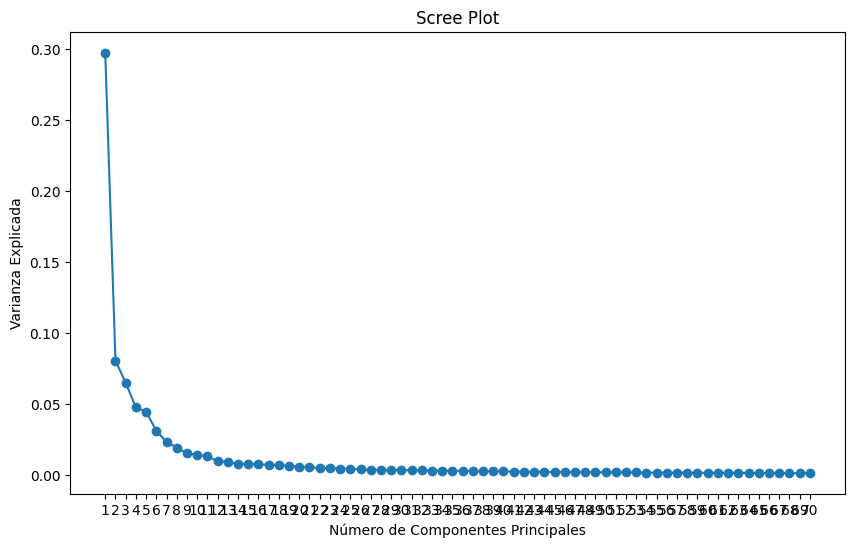

In [51]:
# Calcular las varianzas explicadas
varianza_explicada = pca.explained_variance_ratio_[:70] #el grafico hasta 900 no se podia observar bien lo acotamos
componentes_principales = np.arange(1, len(varianza_explicada) + 1)

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(componentes_principales, varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

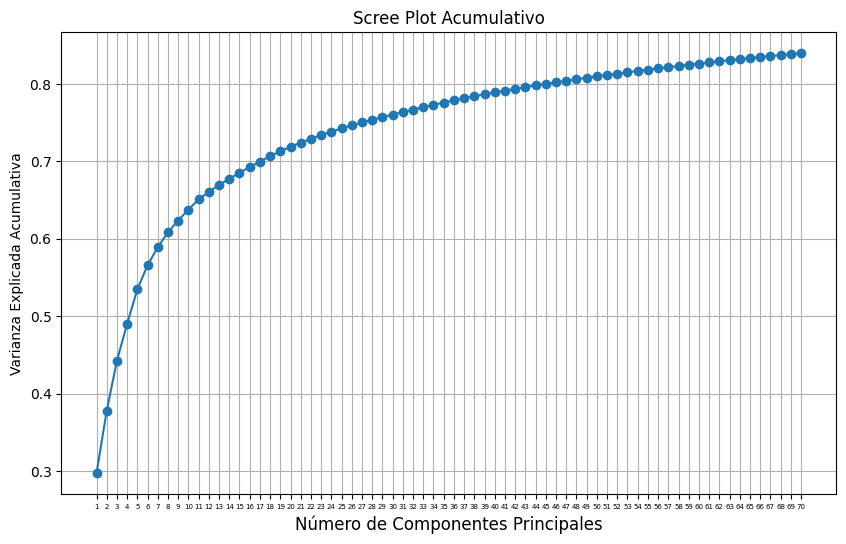

In [52]:
# Calcular la varianza explicada acumulativa
varianza_explicada = np.cumsum(pca.explained_variance_ratio_[:70])
num_componentes = len(varianza_explicada)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

###  PCA-Libreria - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


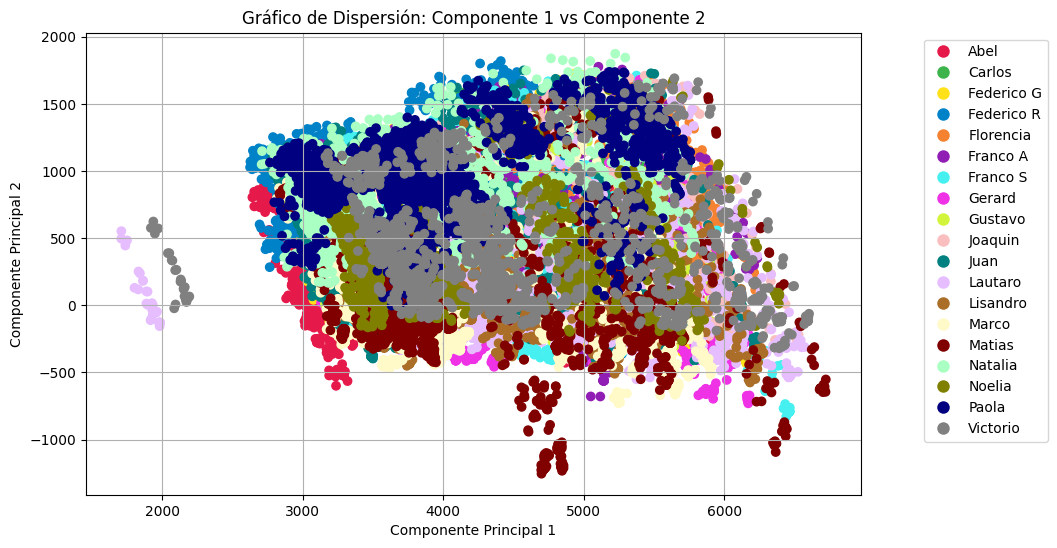

 Comparación de proyeccion de componentes: 3 - 4


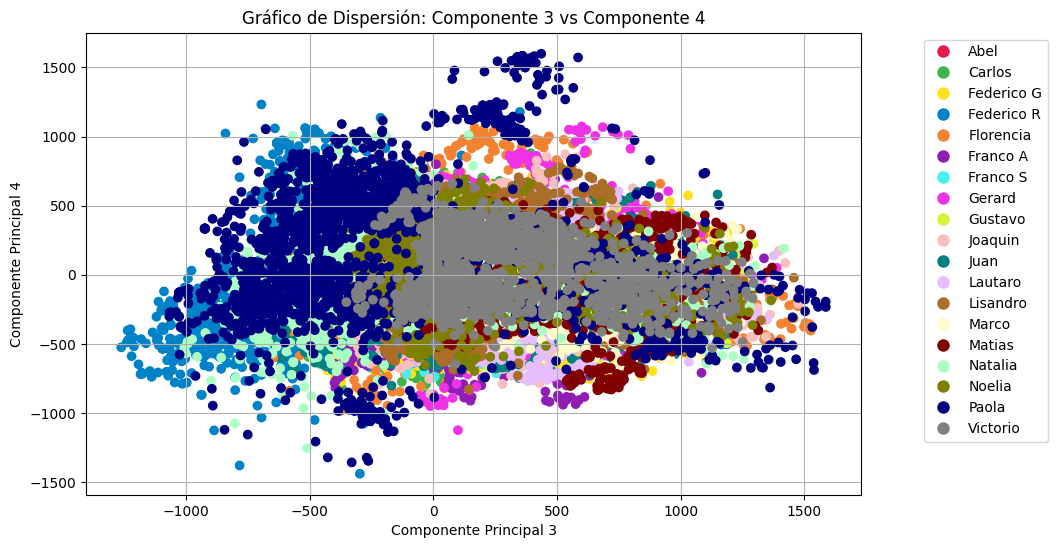

 Comparación de proyeccion de componentes: 5 - 6


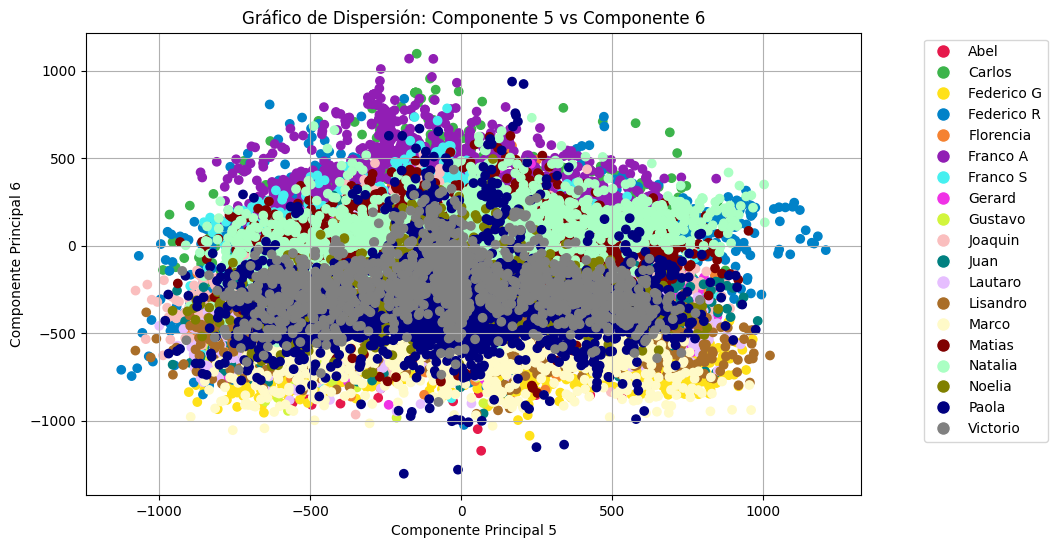

 Comparación de proyeccion de componentes: 7 - 8


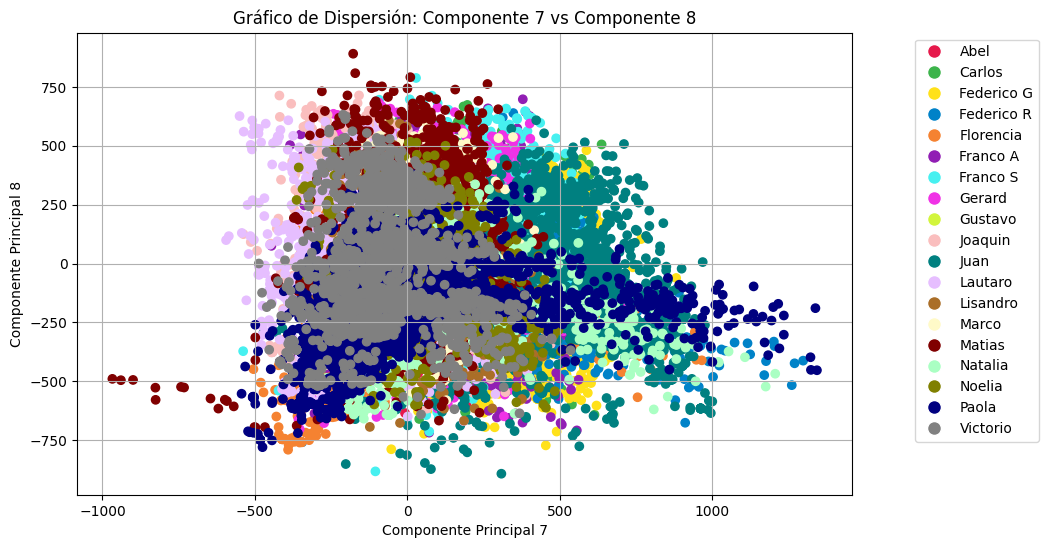

In [53]:
imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)


# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = imagenes_transformadas[:, i] #relacion de la componente1 en cada
    componente2 = imagenes_transformadas[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

###  PCA-Libreria - Observamos imagenes de las primeras componentes

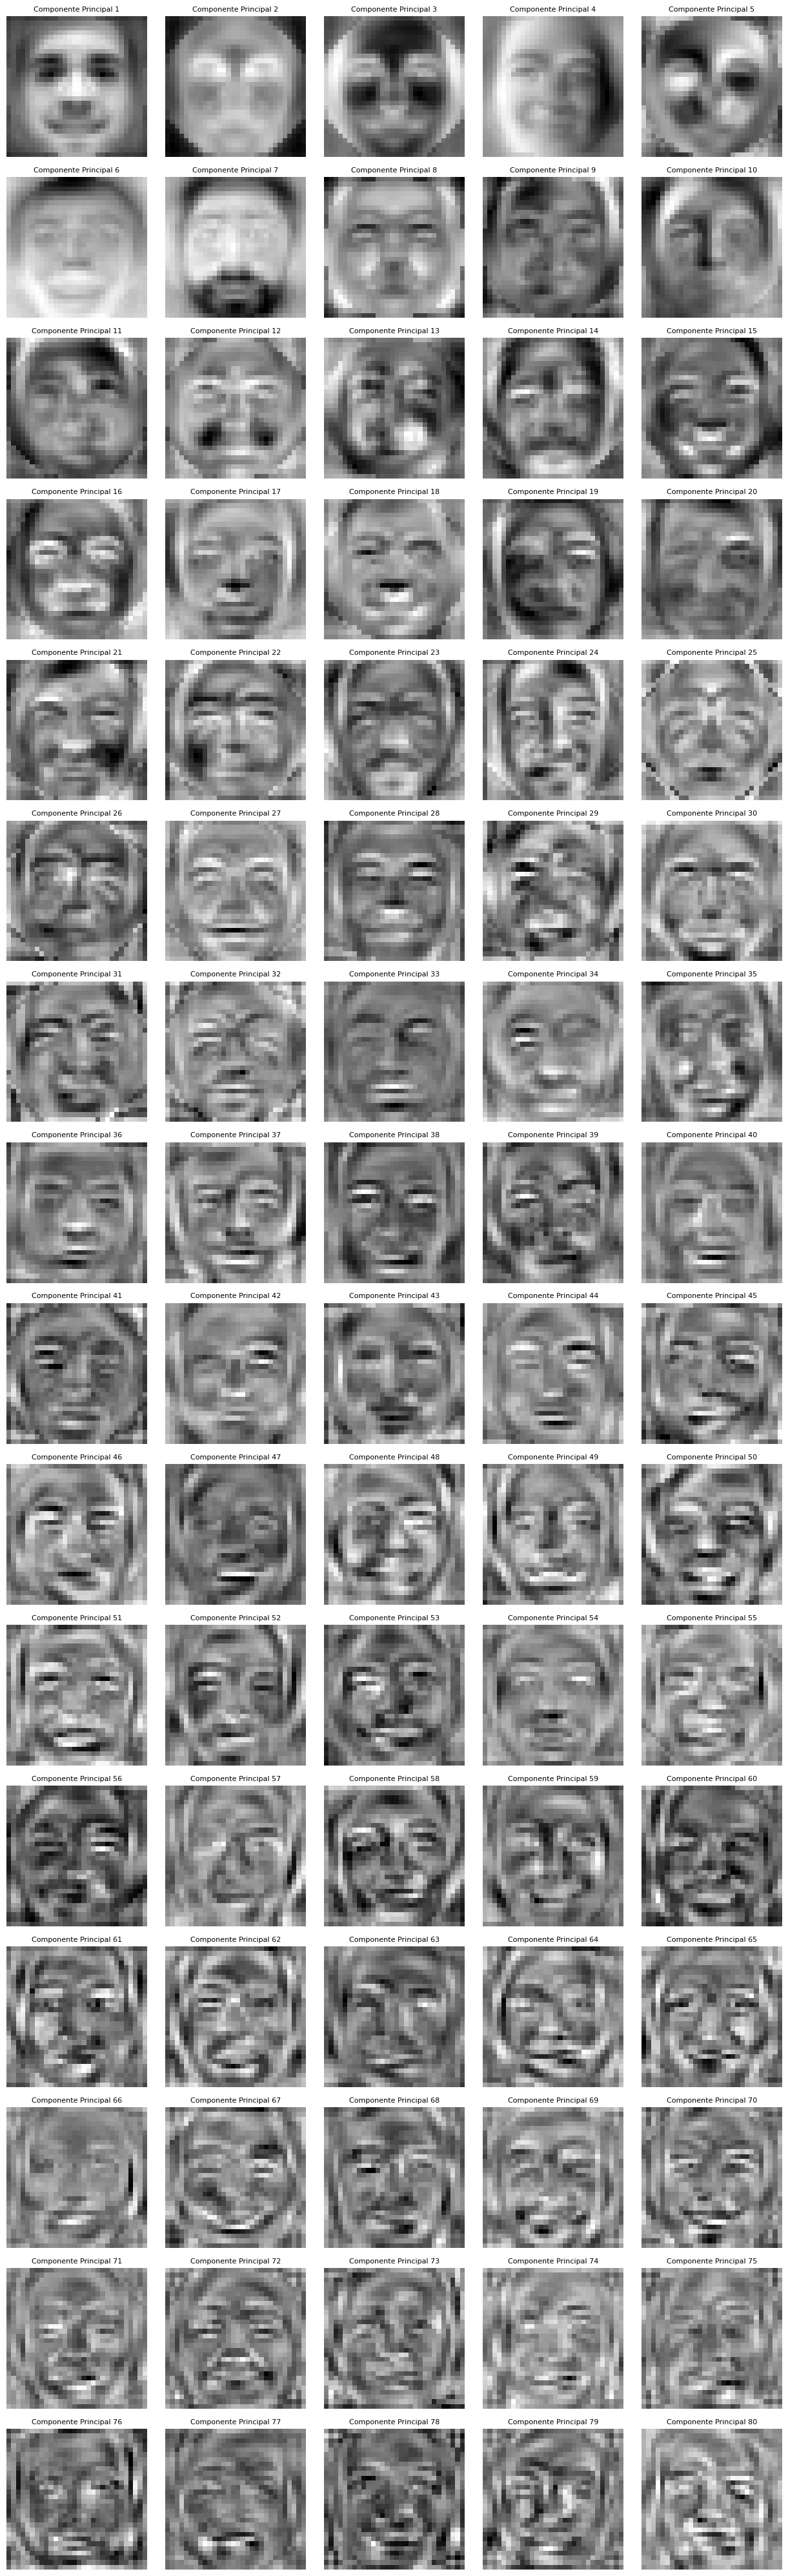

In [54]:

# observamos, imagenes armadas con los primeros 4 componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

## PCA Paso a Paso

In [55]:
import numpy as np

new_faces_array = image_matrix

#### Pca-Paso A Paso - Estandarizamos

In [56]:
# Paso 1: Calcular la media de cada característica
mean = np.mean(new_faces_array, axis=0)

# Paso 2: Calcular la desviación estándar de cada característica
std = np.std(new_faces_array, axis=0)

# Paso 3: Estandarizar los datos (restar la media y dividir por la desviación estándar)
new_faces_array_estandarizado = (new_faces_array - mean) / std #equivaente a imagenes_estandarizadas

In [57]:
new_faces_array_estandarizado

array([[ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       [ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       [ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       ...,
       [-0.92168334, -1.03356492, -1.03568341, ..., -1.02465414,
        -0.98883588, -0.90607177],
       [-0.92168334, -1.03356492, -1.03568341, ..., -1.02465414,
        -0.98883588, -0.90607177],
       [ 0.71264737,  0.61291008,  0.6618248 , ...,  0.5181221 ,
         0.50302271,  0.54276576]])

In [58]:
imagenes_estandarizadas #observamos que es lo mismoque se obtiene opr el paquer

array([[ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       [ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       [ 1.06382587,  0.93113634,  1.0502377 , ..., -0.30357394,
        -0.20192146, -0.14095532],
       ...,
       [-0.92168334, -1.03356492, -1.03568341, ..., -1.02465414,
        -0.98883588, -0.90607177],
       [-0.92168334, -1.03356492, -1.03568341, ..., -1.02465414,
        -0.98883588, -0.90607177],
       [ 0.71264737,  0.61291008,  0.6618248 , ...,  0.5181221 ,
         0.50302271,  0.54276576]])

### Pca-Paso A Paso - Calculamos las matrices

In [59]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_estandarizado, rowvar=False)

In [60]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [61]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [62]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = eigenvalues / np.sum(eigenvalues) * 100
total_variance = np.cumsum(explained_variances) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 90) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)


Cantidad de componentes a utilizar: 152
[2.97030812e+01 8.05988069e+00 6.48670951e+00 4.75224665e+00
 4.46020685e+00 3.11012461e+00 2.32651505e+00 1.93198103e+00
 1.51827678e+00 1.41547933e+00 1.31199815e+00 9.74618424e-01
 9.01272819e-01 7.80790530e-01 7.69403346e-01 7.43598492e-01
 7.19612634e-01 6.92380133e-01 6.29894211e-01 5.86509017e-01
 5.41608738e-01 4.92433992e-01 4.87481096e-01 4.35107235e-01
 4.20475491e-01 3.95025644e-01 3.67171044e-01 3.47559317e-01
 3.43198444e-01 3.35792907e-01 3.27530078e-01 3.14889091e-01
 3.08751588e-01 3.01646280e-01 2.96836026e-01 2.89562481e-01
 2.67327690e-01 2.56388009e-01 2.46105756e-01 2.44616029e-01
 2.36841225e-01 2.34774637e-01 2.18816029e-01 2.13584677e-01
 2.05754667e-01 2.02849937e-01 1.97435969e-01 1.91475258e-01
 1.89301492e-01 1.83540188e-01 1.80992257e-01 1.76480306e-01
 1.75564289e-01 1.67852477e-01 1.65039162e-01 1.63182477e-01
 1.60433134e-01 1.56660006e-01 1.52989782e-01 1.51280840e-01
 1.47390901e-01 1.46896806e-01 1.44232583e-01

In [63]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_estandarizado, eigenvectors) #multiplicacion matricial

In [64]:
eigenvectors #equivalente a PCA component calculado previamente con la libreria

array([[ 2.01701876e-02,  6.27788320e-02, -1.89077992e-02, ...,
        -4.91179858e-02,  2.94311327e-02, -3.69748334e-01],
       [ 2.24330129e-02,  6.77663280e-02, -2.04962426e-02, ...,
         5.87118644e-02,  6.10799272e-03,  2.37171931e-01],
       [ 2.26147470e-02,  6.76699406e-02, -1.40475018e-02, ...,
         7.73408218e-03, -5.28641012e-03, -5.25544302e-04],
       ...,
       [ 2.14056322e-02,  7.36249889e-02, -9.29463105e-04, ...,
         5.22438249e-03, -8.29120805e-03, -1.54195391e-02],
       [ 2.11370933e-02,  7.44918930e-02, -2.69383762e-03, ...,
        -8.72387170e-05,  2.21786852e-02, -1.72842403e-03],
       [ 1.94220102e-02,  7.09638101e-02, -1.80125797e-03, ...,
        -9.44135556e-03, -2.09010549e-02,  4.61622278e-02]])

In [65]:
eigenvectors.T

array([[ 2.01701876e-02,  2.24330129e-02,  2.26147470e-02, ...,
         2.14056322e-02,  2.11370933e-02,  1.94220102e-02],
       [ 6.27788320e-02,  6.77663280e-02,  6.76699406e-02, ...,
         7.36249889e-02,  7.44918930e-02,  7.09638101e-02],
       [-1.89077992e-02, -2.04962426e-02, -1.40475018e-02, ...,
        -9.29463105e-04, -2.69383762e-03, -1.80125797e-03],
       ...,
       [-4.91179858e-02,  5.87118644e-02,  7.73408218e-03, ...,
         5.22438249e-03, -8.72387170e-05, -9.44135556e-03],
       [ 2.94311327e-02,  6.10799272e-03, -5.28641012e-03, ...,
        -8.29120805e-03,  2.21786852e-02, -2.09010549e-02],
       [-3.69748334e-01,  2.37171931e-01, -5.25544302e-04, ...,
        -1.54195391e-02, -1.72842403e-03,  4.61622278e-02]])

In [66]:
pca.components_

array([[ 2.01701876e-02,  2.24330129e-02,  2.26147470e-02, ...,
         2.14056322e-02,  2.11370933e-02,  1.94220102e-02],
       [-6.27788320e-02, -6.77663280e-02, -6.76699406e-02, ...,
        -7.36249889e-02, -7.44918930e-02, -7.09638101e-02],
       [-1.89077992e-02, -2.04962426e-02, -1.40475018e-02, ...,
        -9.29463105e-04, -2.69383762e-03, -1.80125797e-03],
       ...,
       [ 4.91179858e-02, -5.87118644e-02, -7.73408218e-03, ...,
        -5.22438249e-03,  8.72387170e-05,  9.44135556e-03],
       [-2.94311327e-02, -6.10799272e-03,  5.28641012e-03, ...,
         8.29120805e-03, -2.21786852e-02,  2.09010549e-02],
       [-3.69748335e-01,  2.37171931e-01, -5.25544302e-04, ...,
        -1.54195391e-02, -1.72842403e-03,  4.61622278e-02]])

### Pca-Paso A Paso - Scree plot

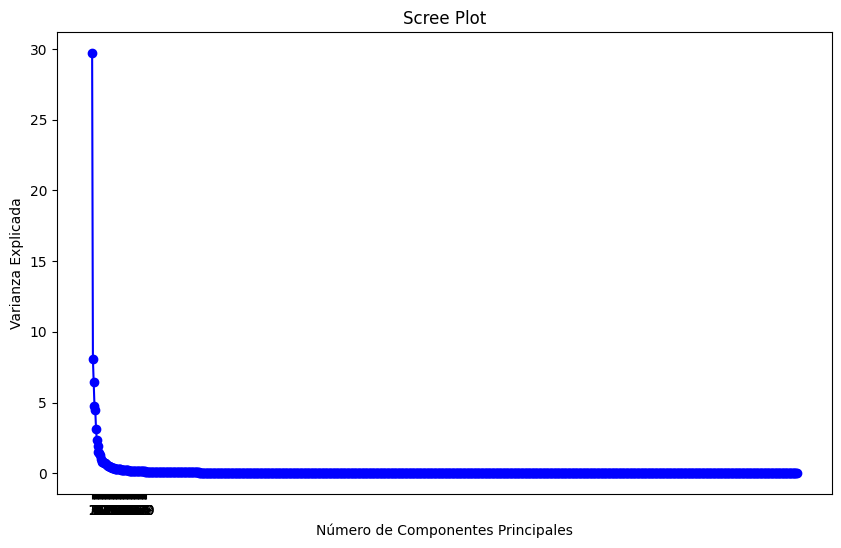

In [67]:
# Calcular las varianzas explicadas

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
#plt.plot(componentes_principales, explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

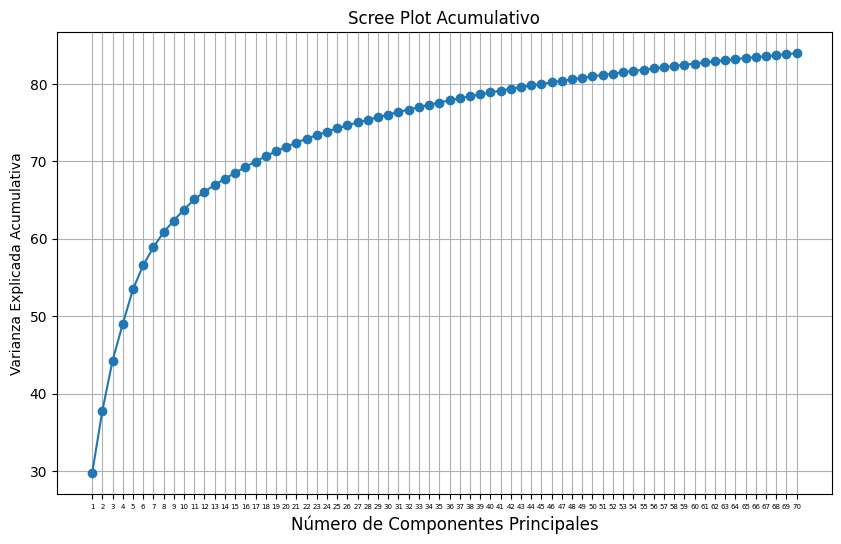

In [68]:
# Calcular la varianza explicada acumulativa
explained_variances2 = np.cumsum(explained_variances[:70])
num_componentes = len(explained_variances2)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), explained_variances2, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

### Pca-Paso A Paso - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


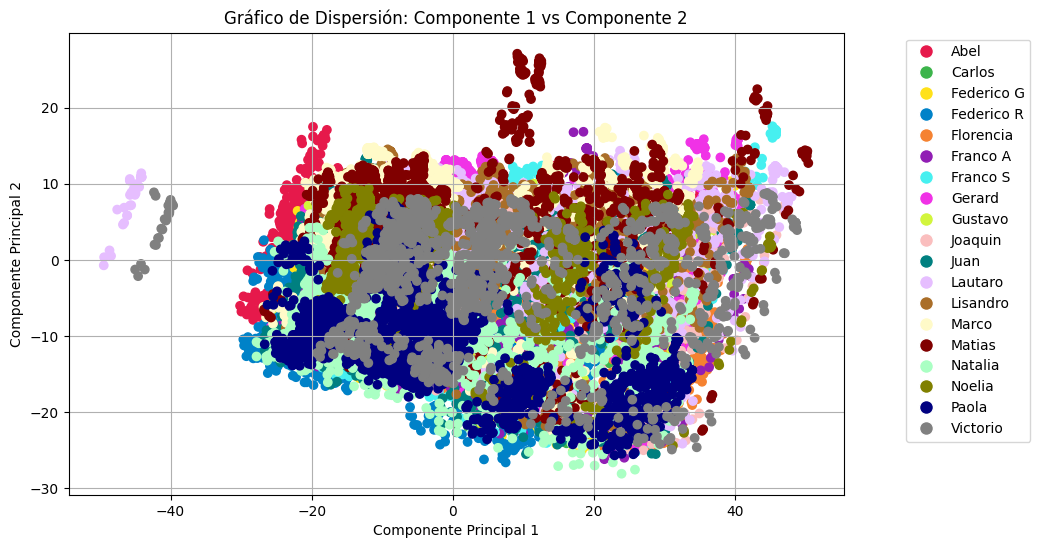

 Comparación de proyeccion de componentes: 3 - 4


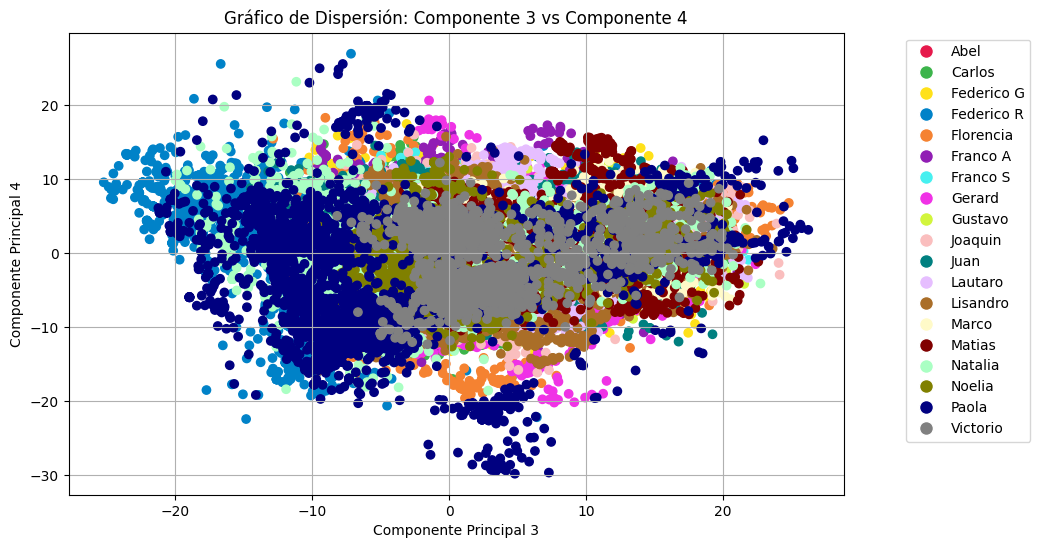

 Comparación de proyeccion de componentes: 5 - 6


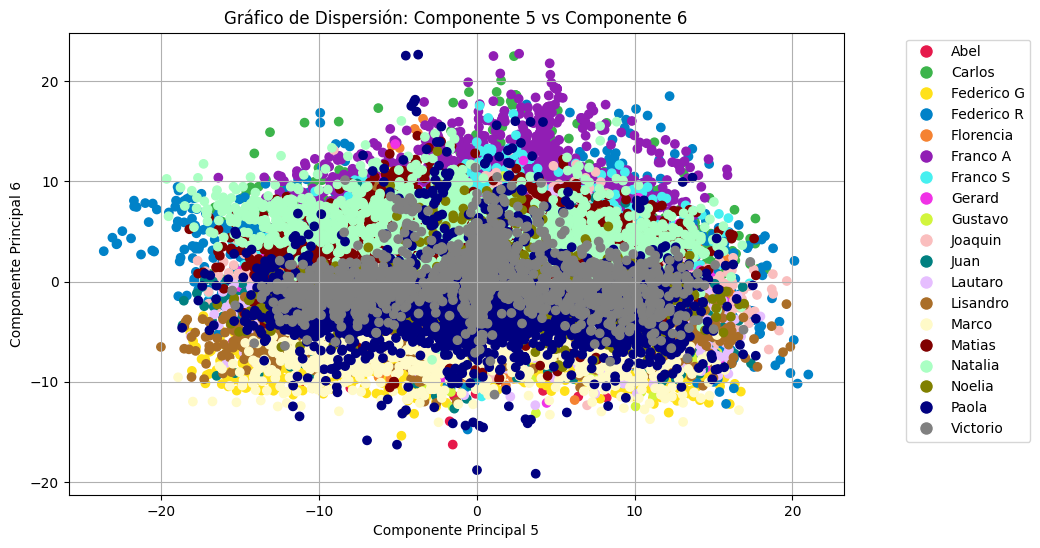

 Comparación de proyeccion de componentes: 7 - 8


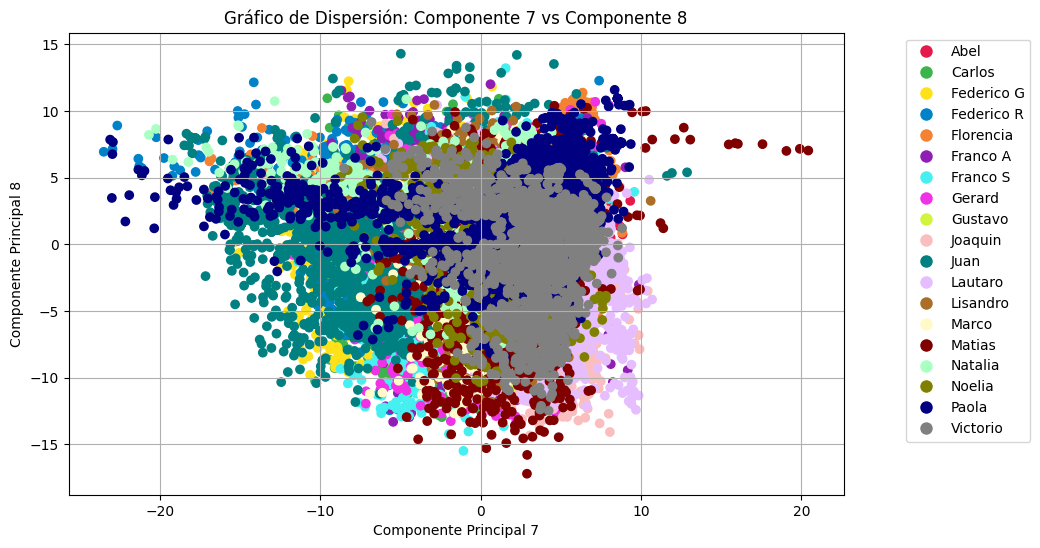

In [69]:
#imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)

new_faces_array_transformed
# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = new_faces_array_transformed[:, i] #relacion de la componente1 en cada
    componente2 = new_faces_array_transformed[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

### Pca-Paso A Paso - Observamos imagenes de las primeras componentes

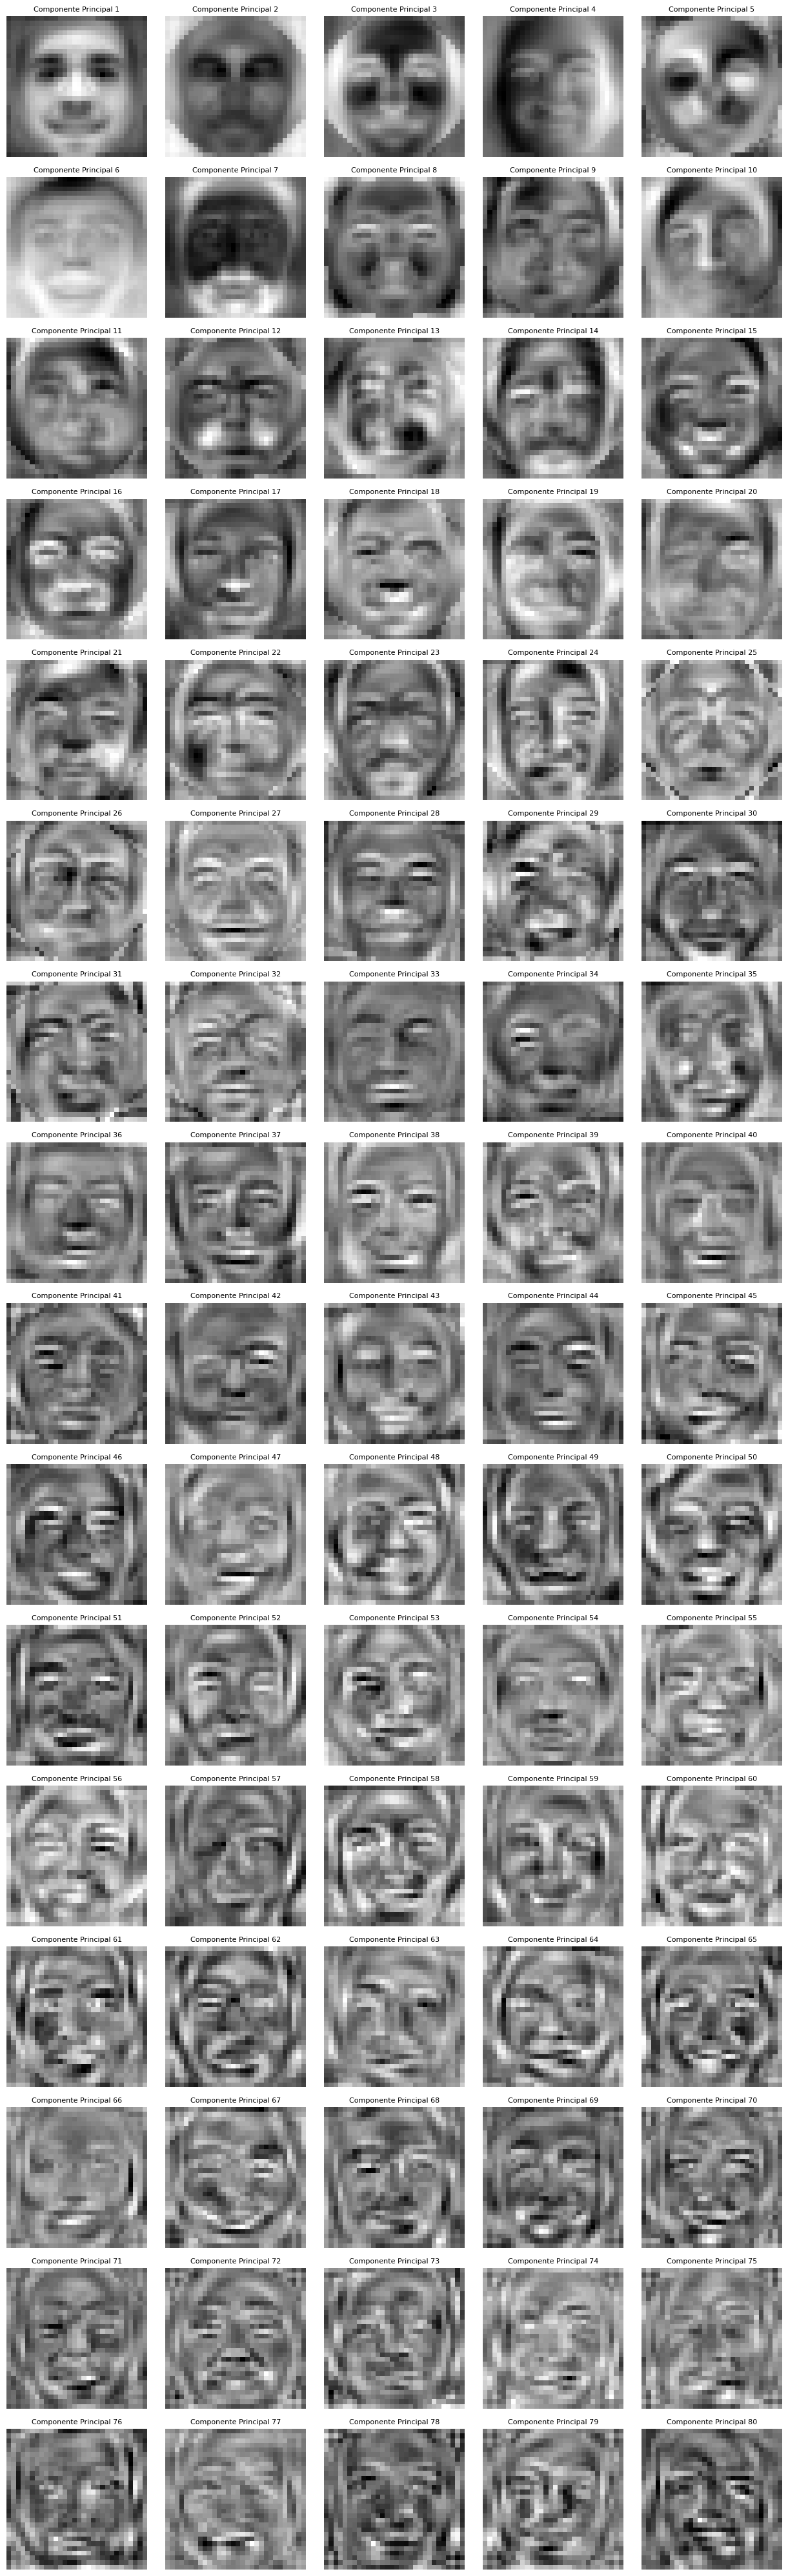

In [70]:
# observamos, imagenes armadas con los primeros  componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    #componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    componente_principal_normalizada = eigenvectors[:, indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

In [71]:
## Back Propagation

In [72]:
# Cargar los componentes PCA guardados
#ruta_pca = root_path + "PCA/Componentes_pca.npy" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
ruta_pca = "../PCA/Componentes_pca.npz" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
# Cargar los datos del archivo .npz
data = np.load(ruta_pca, allow_pickle=True)

components = data['components']  # Componentes principales
#mean = data['mean']              # Media de los datos
labels = data['labels']          # Etiquetas asociadas

# Cargar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl' #
with open(ruta_scaler, 'rb') as f:
    scaler = pickle.load(f)

In [73]:


# Estandarizar las imágenes usando el escalador cargado
nuevas_imagenes_estandarizadas = scaler.transform(image_matrix)  # Escalador ya cargado

# Centrar las imágenes con la media del PCA #no es necesario si se usa scalador
#nuevas_imagenes_centradas = nuevas_imagenes_estandarizadas - mean

# Proyectar al espacio PCA
imagenes_pca_reducidas = np.dot(nuevas_imagenes_estandarizadas, components.T)


#print(imagenes_pca_reducidas)

imagenes_pca_reducidas.shape
personas = np.unique(image_person)
image_person #(vector que tiene el nombre de la persona de cada foto)
personas
personas.shape
cantidad_personas = len(personas)
print(cantidad_personas) 
cantidad_fotos = len(image_person)
cantidad_fotos

imagenes_pca_reducidas[0]

19


array([ 6.69823243, -1.93165111, -7.61169795,  1.39734198, -3.72331148,
        3.03043155, -1.32931277, -0.15979165, -0.08586091, -2.27376383,
        2.06154931,  0.48566112, -1.39772042, -1.47259687, -0.28553185,
       -1.68770348,  0.29516425, -0.43713055,  1.65107325, -0.39274939,
       -3.33168208,  1.62360342,  4.51555589,  3.45890171, -3.14295497,
       -0.12771438, -2.55610303,  1.38414408,  2.12482763, -0.14963274,
       -2.68378783, -1.38918855, -2.68307005, -1.55076464, -0.35274631,
       -0.53560762, -1.02666727,  0.13878405,  0.64279838, -0.5681884 ,
       -0.75622188,  0.30896844, -0.69443939, -0.33598638, -0.26306306,
        1.70750278, -0.65425245,  2.00293385, -0.70691705,  2.31931956,
        0.7396705 ,  1.06383871,  0.19200065, -0.00966876,  2.07695055,
       -0.44600284,  0.29421947,  0.43104451, -0.06850528,  0.54439609])

In [74]:

from sklearn.preprocessing import  LabelBinarizer

# Convertir los valores de la var categórica en números
#salida_lista = LabelBinarizer().fit_transform(image_person) #convierte los nombres (var categorica) en vextores con un 1 en la posicion del nombre
#correspondiente, tiene un renglon por foto y el vector una columna por nombre solo un 1 en el nombre de la persona de la foto


label_binarizer = LabelBinarizer()
salida_lista = label_binarizer.fit_transform(image_person)

X = imagenes_pca_reducidas
Y = salida_lista


# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
salida = np.array(salida_lista)
Y = salida 


# Semilla para reproducibilidad
np.random.seed(1021) #Establece la semilla para las funciones aleatorias de numpy.  
#tf.random.set_seed(1021) #Establece la semilla para las funciones aleatorias de TensorFlow, asegurando que los pesos iniciales de la red neuronal y 4cualquier otra operación aleatoria en TensorFlow sean reproducibles.
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1021)

In [75]:
salida_lista

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [76]:
salida

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [77]:
#ejemplo 3
# Asumiendo que ya tienes X_train, X_test, Y_train, Y_test definidos
# Inicialización de parámetros
input_size = X_train.shape[1]  # Número de características (componentes PCA)
epoch_limit = 1000

hidden_size = X_train.shape[1]*3# Número de neuronas en la capa oculta
output_size = 19  # Número de clases (cantidad de personas)

# Inicialización de pesos y biases
np.random.seed(1021)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Funciones de activación

from Funciones import relu
from Funciones import softmax
from Funciones import relu_derivative

# Función de pérdida: entropía cruzada

from Funciones import categorical_crossentropy

# Forward propagation

from Funciones import forward_propagation

# Backpropagation

from Funciones import backpropagation

# Entrenamiento del modelo
epochs = epoch_limit
learning_rate = 0.5
for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    # Cálculo de la pérdida
    loss = categorical_crossentropy(Y_train.T, A2)

    # Aquí puedes imprimir el avance en cada epoch
    if epoch % 100 == 0 or epoch == epochs - 1:  # Imprime cada 100 epochs o el último epoch
        # Calcular precisión en el conjunto de entrenamiento
        predictions_train = np.argmax(A2, axis=0)
        labels_train = np.argmax(Y_train, axis=1)
        accuracy_train = np.mean(predictions_train == labels_train)
        
        print(f"Epoch {epoch}, Loss: {loss:.6f}, Training Accuracy: {accuracy_train * 100:.2f}%")
    
    # Backpropagation
    W1, b1, W2, b2 = backpropagation(X_train, Y_train, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)



Epoch 0, Loss: 2.945466, Training Accuracy: 5.18%
Epoch 100, Loss: 0.287352, Training Accuracy: 92.93%
Epoch 200, Loss: 0.139434, Training Accuracy: 96.94%
Epoch 300, Loss: 0.087781, Training Accuracy: 98.24%
Epoch 400, Loss: 0.062684, Training Accuracy: 98.85%
Epoch 500, Loss: 0.047694, Training Accuracy: 99.19%
Epoch 600, Loss: 0.037671, Training Accuracy: 99.40%
Epoch 700, Loss: 0.030587, Training Accuracy: 99.55%
Epoch 800, Loss: 0.025388, Training Accuracy: 99.69%
Epoch 900, Loss: 0.021458, Training Accuracy: 99.77%
Epoch 999, Loss: 0.018433, Training Accuracy: 99.84%


In [78]:
# Evaluación del modelo en el conjunto de prueba
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
test_loss = categorical_crossentropy(Y_test.T, A2_test)
print(f"Test Loss: {test_loss}")

# Calcular precisión en el conjunto de prueba
predictions_test = np.argmax(A2_test, axis=0)
labels_test = np.argmax(Y_test, axis=1)
accuracy_test = np.mean(predictions_test == labels_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


Test Loss: 0.04497203951907661
Test Accuracy: 98.96%


In [79]:
# Propagación hacia adelante en el conjunto de prueba
#Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)

# Iterar sobre las predicciones y mostrar el resultado para cada foto
for i in range(len(A2_test.T)):
    # Obtener la predicción para la i-ésima foto
    prediction = A2_test.T[i]
    
    # Encontrar la etiqueta predicha (la clase con probabilidad más alta)
    predicted_label = np.argmax(prediction)  # Identifica la clase que el modelo considera más probable para la imagen
    
    # Mostrar el resultado real y la predicción
    real_label = np.argmax(Y_test[i])
    predicted_probability = np.max(prediction)
    
    print(f"Foto {i+1}: Real = {real_label}, Predicción = {predicted_label}, Probabilidad = {predicted_probability:.4f}, Probabilidades = {prediction}")


Foto 1: Real = 18, Predicción = 18, Probabilidad = 0.9999, Probabilidades = [1.78608599e-06 3.28053314e-06 3.86722826e-10 2.13311980e-10
 7.72895085e-07 6.05212888e-06 1.06154595e-06 4.39856038e-06
 1.51729848e-07 1.23729811e-05 2.97649305e-09 5.59123132e-07
 1.37255326e-09 1.80140818e-07 2.53554836e-07 2.67033480e-08
 3.63433715e-09 5.29174666e-05 9.99916178e-01]
Foto 2: Real = 12, Predicción = 12, Probabilidad = 0.9997, Probabilidades = [6.98101155e-05 2.09544274e-09 1.27406161e-06 7.21143967e-05
 9.47799403e-11 1.50260539e-06 9.46464955e-06 8.75563222e-05
 6.80100339e-10 1.20603552e-09 2.18891355e-07 1.69940404e-08
 9.99724770e-01 8.19390149e-06 3.42112100e-07 1.36281364e-08
 9.28965676e-06 1.50667025e-05 3.62368938e-07]
Foto 3: Real = 6, Predicción = 6, Probabilidad = 0.9982, Probabilidades = [1.06676940e-08 5.61474921e-06 6.28447194e-13 1.60903563e-07
 3.81425115e-10 3.95902133e-05 9.98239043e-01 1.36597627e-05
 9.74771020e-09 1.31283103e-05 3.67427099e-09 1.03495173e-09
 4.654062

In [80]:
# Obtener las predicciones (clase con mayor probabilidad)
y_predicho = np.argmax(A2_test, axis=0)  # axis=0 porque A2_test tiene la forma (clases, muestras)
y_testeo = np.argmax(Y_test, axis=1)  # axis=1 para obtener las etiquetas reales

# Identificar los errores de predicción
error_i = (y_predicho != y_testeo)

# Mostrar los índices donde ocurrieron los errores
print("Errores de predicción en los índices:", np.where(error_i)[0])
print("Total de errores:", np.sum(error_i))

Errores de predicción en los índices: [  42   44   56   78  181  184  209  379  598  626  642  731  846  871
 1008 1078 1124 1195 1210 1285 1305 1385 1417 1549 1552 1647 1667 1908
 1939 1961 1992 2411 2522 2542 2691 2947 3039 3099 3195 3220 3581 3595
 3628 3891 4014 4168 4178 4361 4532 4567 4660 5069 5260 5267 5300 5329
 5466 6117 6147 6209 6275 6298 6338 6350 6372 6448 6509 6537 6572 6726
 6911 6955 6980 7027 7130 7329 7486 7524 7669 7673 7753 7779]
Total de errores: 82


In [81]:
import pandas as pd
# Convertir índices de clases a nombres de clases
y_test_names = label_binarizer.inverse_transform(A2_test.T) #reales de test
y_pred_names = label_binarizer.inverse_transform(Y_test)


# Crear DataFrame
tabla_resultados = pd.DataFrame({
    'y_predicho': y_pred_names,
    'y_testeo': y_test_names
})
tabla_resultados['Predicción correcta'] = tabla_resultados['y_predicho'] == tabla_resultados['y_testeo']
tabla_resultados

y_predicho    y_testeo  Predicción correcta
0       Victorio    Victorio                 True
1       Lisandro    Lisandro                 True
2       Franco S    Franco S                 True
3       Lisandro    Lisandro                 True
4       Franco S    Franco S                 True
...          ...         ...                  ...
7844       Marco       Marco                 True
7845     Joaquin     Joaquin                 True
7846        Juan        Juan                 True
7847      Gerard      Gerard                 True
7848  Federico G  Federico G                 True

[7849 rows x 3 columns]

In [82]:
tabla_resultados_T=tabla_resultados[tabla_resultados['Predicción correcta'] == True]
tabla_resultados_T

y_predicho    y_testeo  Predicción correcta
0       Victorio    Victorio                 True
1       Lisandro    Lisandro                 True
2       Franco S    Franco S                 True
3       Lisandro    Lisandro                 True
4       Franco S    Franco S                 True
...          ...         ...                  ...
7844       Marco       Marco                 True
7845     Joaquin     Joaquin                 True
7846        Juan        Juan                 True
7847      Gerard      Gerard                 True
7848  Federico G  Federico G                 True

[7767 rows x 3 columns]

In [83]:
tabla_resultados_F=tabla_resultados[tabla_resultados['Predicción correcta'] == False]
tabla_resultados_F

y_predicho  y_testeo  Predicción correcta
42       Gerard   Lautaro                False
44      Gustavo   Lautaro                False
56        Paola      Abel                False
78     Franco A    Matias                False
181      Gerard      Abel                False
...         ...       ...                  ...
7524    Joaquin   Lautaro                False
7669   Lisandro    Noelia                False
7673   Victorio  Franco A                False
7753    Joaquin    Matias                False
7779       Abel  Victorio                False

[82 rows x 3 columns]

## Guardar pesos

In [84]:
ruta_modelo = os.path.join(root_path , 'Back_propagation')
ruta_modelo = os.path.join(ruta_modelo , 'Modelo')

#print(ruta_modelo_3c)
# Guardar los pesos y biases en la carpeta especificada
np.save(os.path.join(ruta_modelo, "W1.npy"), W1)
np.save(os.path.join(ruta_modelo, "b1.npy"), b1)
np.save(os.path.join(ruta_modelo, "W2.npy"), W2)
np.save(os.path.join(ruta_modelo, "b2.npy"), b2)
#np.save(os.path.join(ruta_modelo, "W3.npy"), W3)
#np.save(os.path.join(ruta_modelo, "X03.npy"), X03)